<a href="https://colab.research.google.com/github/shriver42/ESAA/blob/project/YB_1%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YB 1조 미니 프로젝트2
# <와인 품질 분류>

# 1. 라이브러리와 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 나눔고딕으로 하면 자꾸 오류나고 다 영어라 상관 없을 것 같아서 실행 안했어욤
# 그래프에서 한글 폰트가 깨지는 것을 방지하기 위해 필요한 요소 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# import matplotlib.pyplot as plt
# plt.rc('font',family='NanumBarunGothic')
# plt.rcParams['axes.unicode_minus']=False

In [3]:
# train data 불러오기
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


# 2. 데이터 탐색하기

Target
* quality: 와인의 품질

Feature variable
*   fixed acidity: 산도
*   volatile acidity: 휘발성산
*   citric acid: 시트르산
*   residual sugar: 잔당 (발효 후 와인 속에 남아있는 당분)
*   chlorides: 염화물
*   free sulfur dioxide: 독립 이산화황
*   total sulfur dioxide: 총 이산화황
*   density: 밀도
*   pH: 수소이온농도
*   sulphates: 황산염
*   alcohol: 도수
*   type: 와인의 종류 (red or white)

In [5]:
# 상위 다섯 개의 행 출력
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [6]:
# 데이터프레임의 행과 열 크기 출력
print('DataFrame 크기:' , train.shape)

DataFrame 크기: (5497, 14)


-> 데이터프레임에서 변수는 14개, 와인 데이터는 총 5497개임을 알 수 있다.

In [7]:
# 칼럼별 결측치 개수, 데이터타입(Dtype) 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


*   데이터의 구분자인 index가 포함되어 있음을 알 수 있다.
*   타겟변수인 quality는 integer타입, 피처변수인 type은 object 타입임을 알 수 있다.
* 결측치는 존재하지 않는다.

# 3. 데이터 전처리

### 1. index 변수 제거
index는 구분자로, 예측하고자 하는 와인의 품질에 영향을 미치지 않으므로 제거한다.

In [8]:
train = train.drop("index", axis=1)

### 2. 피처 변수인 type 원핫인코딩

type 변수는 white와 red으로 이루어져있다는 것을 알 수 있다.

In [9]:
train["type"].value_counts()

type
white    4159
red      1338
Name: count, dtype: int64

white와 red로 이루어진 type변수를 원핫인코딩한다.

In [10]:
train = pd.get_dummies(data=train, columns = ["type"], prefix=["type"], dtype=int)

In [11]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,1


-> 원핫인코딩을 통해 type_red과 type_white 변수를 생성하고, 와인의 type을 0과 1로 나타냈음을 알 수 있다.

### 3. 타겟변수인 Y 라벨인코딩

타겟변수인 "quality"는 카테고리가 여러 개인 범주형 변수이므로 라벨인코딩으로 데이터를 처리한다.

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["quality"])
train["quality"] = le.transform(train["quality"])

test data도 위와 같은 과정을 통해 타겟변수 전처리를 진행한다.

In [13]:
test = test.drop("index", axis=1)
test = pd.get_dummies(data=test, columns = ["type"], prefix=["type"], dtype=int)

### 4. train 데이터를 Y, X로 분리

In [14]:
# X, Y split
train_Y = train.iloc[:,0]
train_X = train.drop("quality", axis=1)

### 5. train 데이터의 피쳐 변수 스케일링

In [15]:
train_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,1


In [16]:
train_X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.243405,0.756595
std,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177,0.429177
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


각 피쳐(X 변수)의 단위가 다르므로 standard scaling을 이용해 피쳐 변수를 전처리한다.

In [17]:
#Standardscaler
from sklearn.preprocessing import StandardScaler
numerical_columns = train_X.select_dtypes(exclude='object').columns.tolist()
ss= StandardScaler()
train_X[numerical_columns] = ss.fit_transform(train_X[numerical_columns])

전처리된 train_X, train_Y 확인하기

In [18]:
train_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,-0.567197,0.567197
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1.763057,-1.763057
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,-0.567197,0.567197
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,-0.567197,0.567197
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,-0.567197,0.567197


In [19]:
train_Y.head()

0    2
1    2
2    2
3    3
4    3
Name: quality, dtype: int64

# 4. 시각화  

모델 quality와 volatile, chlorides, density, alchol, type 간 correlation 확인

In [20]:
train.corr().head(1)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
quality,1.0,-0.076506,-0.261557,0.079157,-0.032848,-0.198148,0.055574,-0.039732,-0.299831,0.017931,0.042068,0.439615,-0.11828,0.11828


<Axes: xlabel='quality', ylabel='count'>

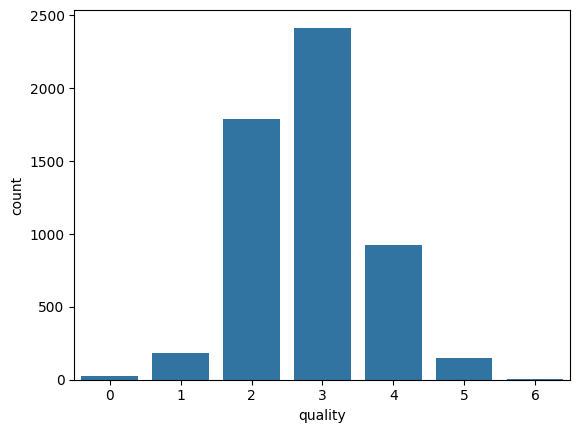

In [21]:
qualitysum = train['quality'].value_counts()
sns.barplot(x=qualitysum.index, y=qualitysum)

- target인 quality의 분포 : 3이 가장 많고 양극단으로 갈수록 적어지는 추세를 보임

<Axes: xlabel='quality', ylabel='citric acid'>

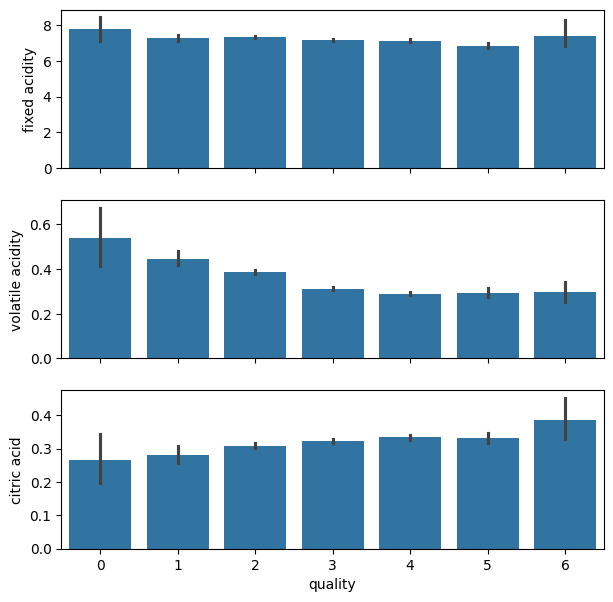

<Figure size 1000x600 with 0 Axes>

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7,7), sharex=True)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = train, ax=ax1)
sns.barplot(x = 'quality', y = 'volatile acidity', data = train, ax=ax2)
sns.barplot(x = 'quality', y = 'citric acid', data = train, ax=ax3)

- fixed acidity에 따른 quality 차이가 거의 없다.
- quality 가 낮을수록 volatile acidity가 높다.
- quality 가 높을수록 citric acid가 높다.

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

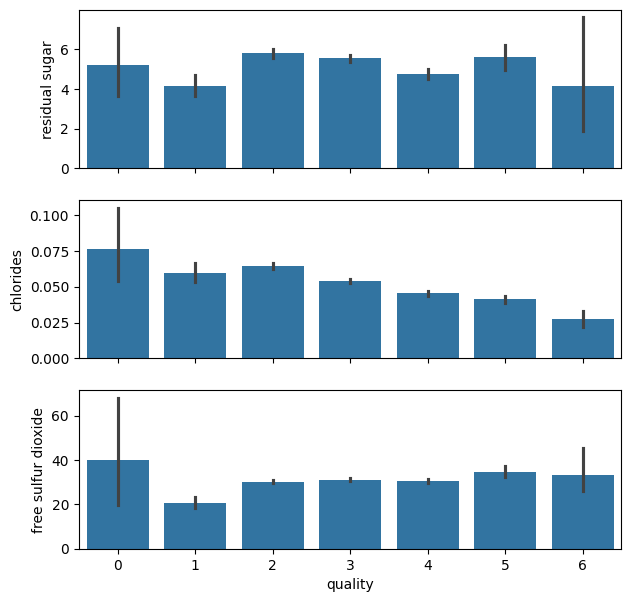

<Figure size 1000x600 with 0 Axes>

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7,7), sharex=True)

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = train, ax=ax1)
sns.barplot(x = 'quality', y = 'chlorides', data = train, ax=ax2)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = train, ax=ax3)

- residual sugar와 quality 간 상관관계 차이는 없어 보인다.
- quality가 높을수록 chlorides가 낮아지는 경향을 보인다.
- qaulity에 따른 free sulfur dioxide 차이는 없어 보인다.

<Axes: xlabel='quality', ylabel='alcohol'>

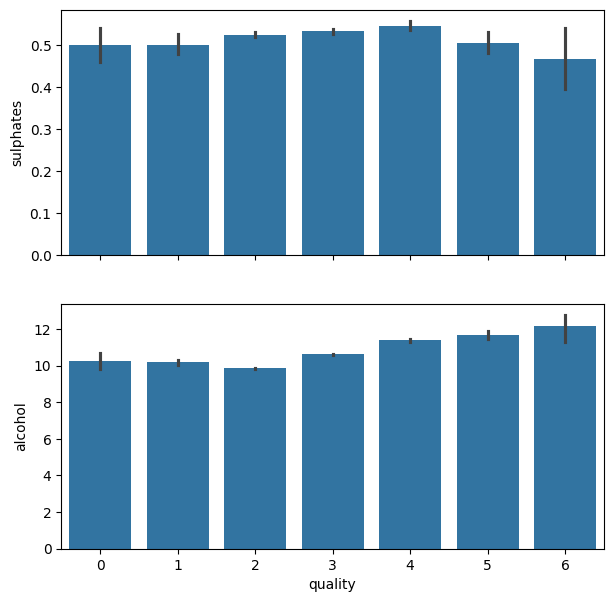

<Figure size 1000x600 with 0 Axes>

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,7), sharex=True)

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = train, ax=ax1)
sns.barplot(x = 'quality', y = 'alcohol', data = train, ax=ax2)

- quality에 대한 sulphates 정도는 비슷하다
- quality가 높을수록 alcohol 함량이 높아지는 경향이 있다.

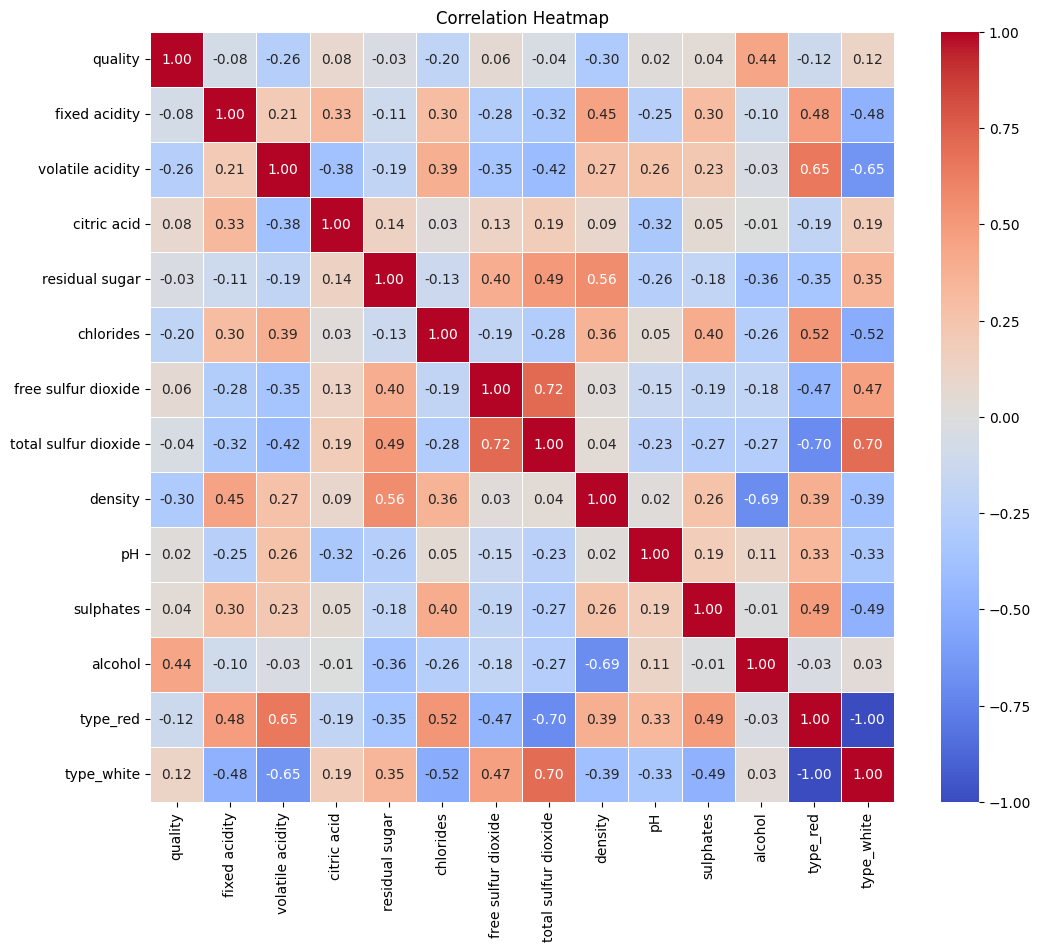

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `data` is your dataset containing features and the target variable

# Compute the correlation matrix
corr_matrix = train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

quality는 alcohol과 강한 양상관 관계, volatile acidity, density와 상대적으로 강한 음상관 관계가 있다,

#### 강한 상관관계를 띠는 피처 위주로 분포 알아보기

<Axes: xlabel='quality', ylabel='alcohol'>

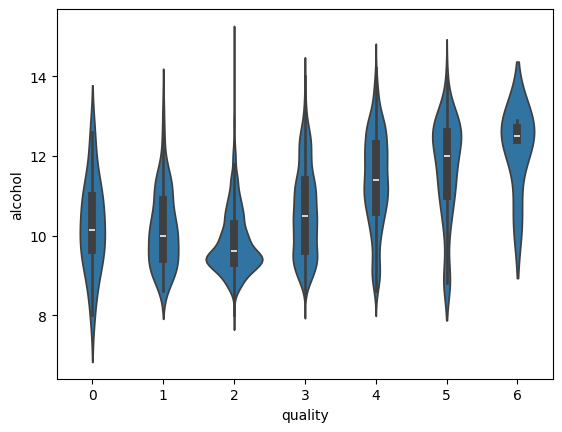

In [26]:
sns.violinplot(x="quality", y="alcohol", data=train)

<Axes: xlabel='quality', ylabel='volatile acidity'>

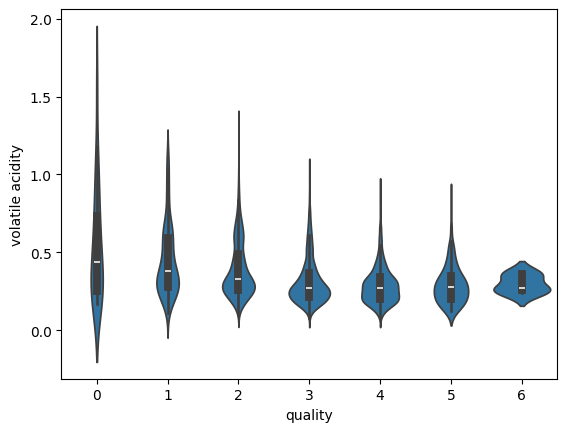

In [27]:
sns.violinplot(x="quality", y="volatile acidity", data=train)

<Axes: xlabel='quality', ylabel='density'>

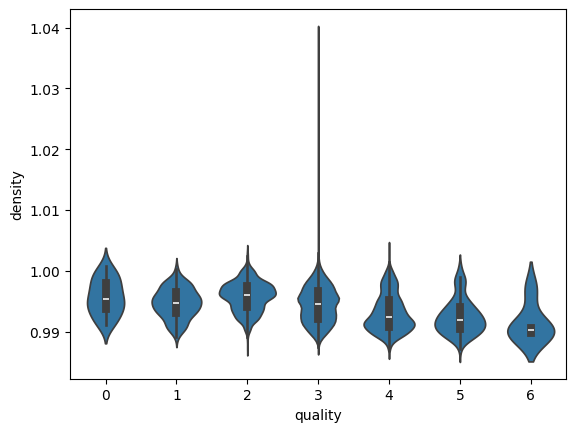

In [28]:
sns.violinplot(x="quality", y="density", data=train)

<Axes: xlabel='quality', ylabel='chlorides'>

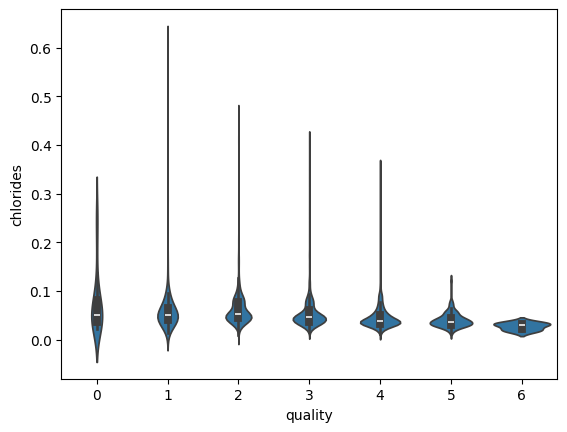

In [29]:
sns.violinplot(x="quality", y="chlorides", data=train)

# 5. 분류 모델 생성

GBM(Gradient Boosting Machine)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y,test_size=.2, random_state=42)

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.5655


XGBoost(eXtra Gradient Boost)

In [31]:
import xgboost as xgb
from xgboost import XGBClassifier

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y,test_size=.2, random_state=42)

xgb_wrapper = XGBClassifier(n_estimator = 400, learning_rate = 0.1, max_depth = 3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='mlogloss', eval_set = evals, verbose=True )
y_pred_xgb = xgb_wrapper.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print('XGBoost 정확도 : {0: .4f}'.format(xgb_accuracy))

#과적합 우려 early_stoppings 없이 돌려봄
xgb_wrapper.fit(X_train, y_train)
y_pred_xgbn = xgb_wrapper.predict(X_test)
xgbn_accuracy = accuracy_score(y_test, y_pred_xgbn)
print('XGBoost without early stoppings 정확도 : {0: .4f}'.format(xgbn_accuracy))

[0]	validation_0-mlogloss:1.84089
[1]	validation_0-mlogloss:1.75580
[2]	validation_0-mlogloss:1.68363
[3]	validation_0-mlogloss:1.62085
[4]	validation_0-mlogloss:1.56582
[5]	validation_0-mlogloss:1.51803
[6]	validation_0-mlogloss:1.47542
[7]	validation_0-mlogloss:1.43756
[8]	validation_0-mlogloss:1.40377
[9]	validation_0-mlogloss:1.37325
[10]	validation_0-mlogloss:1.34567
[11]	validation_0-mlogloss:1.32138
[12]	validation_0-mlogloss:1.29930
[13]	validation_0-mlogloss:1.27796
[14]	validation_0-mlogloss:1.26001
[15]	validation_0-mlogloss:1.24289
[16]	validation_0-mlogloss:1.22750
[17]	validation_0-mlogloss:1.21272
[18]	validation_0-mlogloss:1.19913


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:23:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[19]	validation_0-mlogloss:1.18697
[20]	validation_0-mlogloss:1.17496
[21]	validation_0-mlogloss:1.16343
[22]	validation_0-mlogloss:1.15350
[23]	validation_0-mlogloss:1.14498
[24]	validation_0-mlogloss:1.13689
[25]	validation_0-mlogloss:1.12868
[26]	validation_0-mlogloss:1.12158
[27]	validation_0-mlogloss:1.11453
[28]	validation_0-mlogloss:1.10841
[29]	validation_0-mlogloss:1.10241
[30]	validation_0-mlogloss:1.09647
[31]	validation_0-mlogloss:1.09106
[32]	validation_0-mlogloss:1.08598
[33]	validation_0-mlogloss:1.08157
[34]	validation_0-mlogloss:1.07689
[35]	validation_0-mlogloss:1.07326
[36]	validation_0-mlogloss:1.06897
[37]	validation_0-mlogloss:1.06525
[38]	validation_0-mlogloss:1.06170
[39]	validation_0-mlogloss:1.05836
[40]	validation_0-mlogloss:1.05509
[41]	validation_0-mlogloss:1.05241
[42]	validation_0-mlogloss:1.04931
[43]	validation_0-mlogloss:1.04669
[44]	validation_0-mlogloss:1.04435
[45]	validation_0-mlogloss:1.04140
[46]	validation_0-mlogloss:1.03977
[47]	validation_0-ml

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:23:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost without early stoppings 정확도 :  0.5591


LGBM(Light Gradient Boosting Machine)

In [33]:
!pip install lightgbm==3.3.2
import lightgbm
print(lightgbm.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0
3.3.2


In [34]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y,test_size=0.2, random_state=42)
lgbm_wrapper = LGBMClassifier(n_estimator = 400)

#조기 중단 설정
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
y_pred_lgbm = lgbm_wrapper.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)

print('LightGBM 정확도 : {0: .4f}'.format(lgbm_accuracy))

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's multi_logloss: 1.21315
[2]	valid_0's multi_logloss: 1.17073
[3]	valid_0's multi_logloss: 1.1412
[4]	valid_0's multi_logloss: 1.11373
[5]	valid_0's multi_logloss: 1.09016
[6]	valid_0's multi_logloss: 1.07223
[7]	valid_0's multi_logloss: 1.05755
[8]	valid_0's multi_logloss: 1.04453
[9]	valid_0's multi_logloss: 1.03446
[10]	valid_0's multi_logloss: 1.02438
[11]	valid_0's multi_logloss: 1.01525
[12]	valid_0's multi_logloss: 1.00759
[13]	valid_0's multi_logloss: 0.999004
[14]	valid_0's multi_logloss: 0.992636
[15]	valid_0's multi_logloss: 0.988446
[16]	valid_0's multi_logloss: 0.982635
[17]	valid_0's multi_logloss: 0.976837
[18]	valid_0's multi_logloss: 0.973283
[19]	valid_0's multi_logloss: 0.969716
[20]	valid_0's multi_logloss: 0.96674
[21]	valid_0's multi_logloss: 0.961425
[22]	valid_0's multi_logloss: 0.958055
[23]	valid_0's multi_logloss: 0.9536
[24]	valid_0's multi_logloss: 0.951794
[25]	valid_0's multi_logloss: 0.94893

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[26]	valid_0's multi_logloss: 0.948015
[27]	valid_0's multi_logloss: 0.945161
[28]	valid_0's multi_logloss: 0.942559
[29]	valid_0's multi_logloss: 0.941613
[30]	valid_0's multi_logloss: 0.93965
[31]	valid_0's multi_logloss: 0.937353
[32]	valid_0's multi_logloss: 0.937689
[33]	valid_0's multi_logloss: 0.936867
[34]	valid_0's multi_logloss: 0.935032
[35]	valid_0's multi_logloss: 0.933838
[36]	valid_0's multi_logloss: 0.933317
[37]	valid_0's multi_logloss: 0.932373
[38]	valid_0's multi_logloss: 0.930818
[39]	valid_0's multi_logloss: 0.930363
[40]	valid_0's multi_logloss: 0.930864
[41]	valid_0's multi_logloss: 0.9302
[42]	valid_0's multi_logloss: 0.930744
[43]	valid_0's multi_logloss: 0.929879
[44]	valid_0's multi_logloss: 0.929995
[45]	valid_0's multi_logloss: 0.928999
[46]	valid_0's multi_logloss: 0.926809
[47]	valid_0's multi_logloss: 0.925937
[48]	valid_0's multi_logloss: 0.925668
[49]	valid_0's multi_logloss: 0.92588
[50]	valid_0's multi_logloss: 0.926963
[51]	valid_0's multi_logloss:

accuracy test로는 전체 모델의 중요도만을 확인 했으니, 그래프로 각 변수의 중요도 확인

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

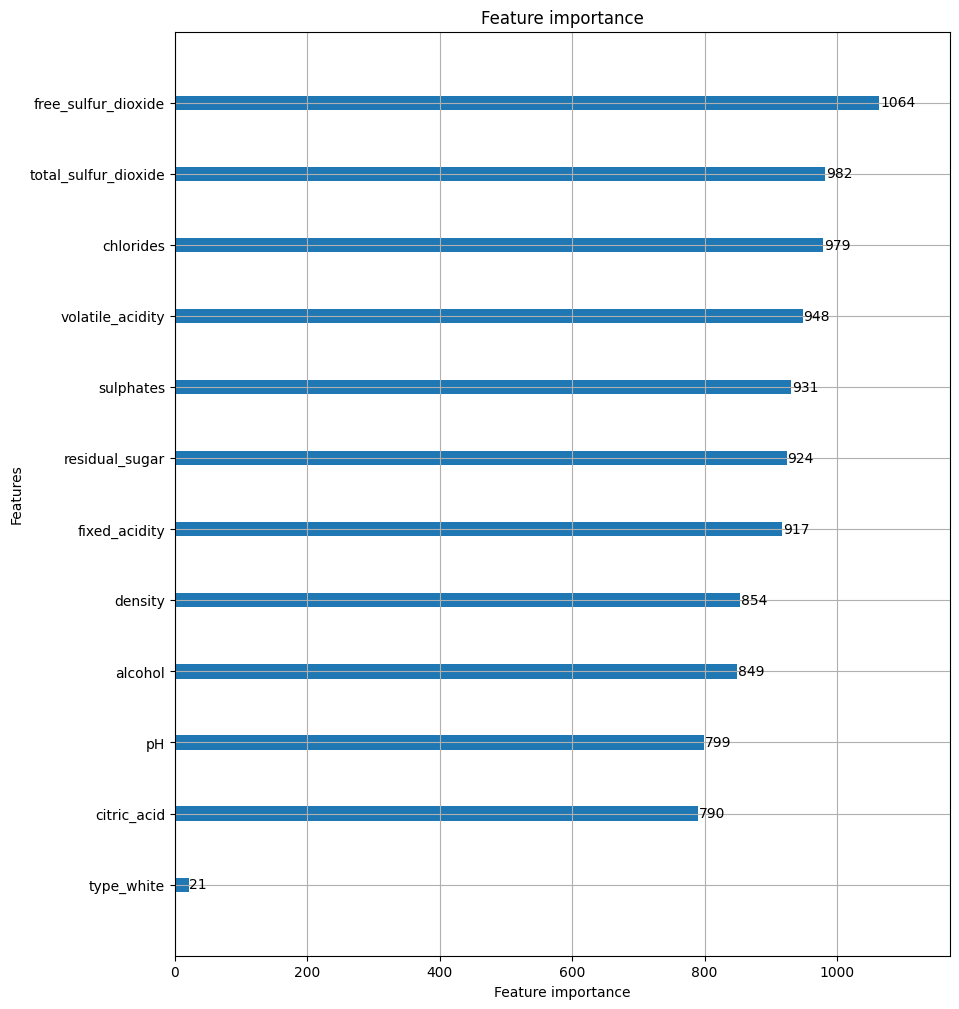

In [35]:
#plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax = ax)

GridSearchCV

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_X,train_Y, test_size=0.2, random_state=42)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
grid_search_rf=GridSearchCV(cv=5,estimator=RandomForestClassifier(),param_grid={'n_estimators':[100,200,300],'max_depth':[4,5,7]},scoring='accuracy')
grid_search_rf.fit(X_train,Y_train)
best_rf=grid_search_rf.best_estimator_
y_pred_rf=best_rf.predict(X_test)
grid_accuracy = accuracy_score(Y_test,y_pred_rf)

print('GridSearchCV 정확도 : {0:.4f}'.format(grid_accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV 정확도 : 0.5882


Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier
grid_search_bc=GridSearchCV(cv=5,estimator=BaggingClassifier(),param_grid={'n_estimators':[100,200,300]},scoring='accuracy')
grid_search_bc.fit(X_train,Y_train)
best_bc=grid_search_bc.best_estimator_
y_pred_bc=best_bc.predict(X_test)
bagging_accuracy = accuracy_score(Y_test,y_pred_bc)

print('Bagging 정확도 : {0:.4f}'.format(bagging_accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Bagging 정확도 : 0.6809


여러 모델을 학습시킨 결과, lgbm과 Bagging이 가장 정확도가 높았으므로 두 모델을 이용하여 test 데이터 예측을 시켜보았다

lgbm 예측 및 시각화하기

In [39]:
lgbm_pred = lgbm_wrapper.predict(test)

In [40]:
smpl_sub = pd.read_csv('/content/sample_submission.csv')
smpl_sub['quality'] = lgbm_pred
smpl_sub

,index,quality
0,0,3
1,1,3
2,2,0
3,3,3
4,4,3
...,...,...
995,995,0
996,996,3
997,997,3
998,998,3


Bagging 예측

In [41]:
best_pred = best_bc.predict(test)

In [42]:
smpl_sub = pd.read_csv('/content/sample_submission.csv')
smpl_sub['quality'] = best_pred
smpl_sub

,index,quality
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3
...,...,...
995,995,3
996,996,3
997,997,3
998,998,3
